In [99]:
pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [100]:
import numpy as np
import pandas as pd

In [101]:
movies = pd.read_csv('./../data/ml-100k/u.info', header=None)
print(movies)

                0
0       943 users
1      1682 items
2  100000 ratings


In [102]:
column_name = ["user id", "movie id", "rating", "timestamp"]
dataset = pd.read_csv('./../data/ml-100k/u.data', sep='\t',header=None,names=column_name)
dataset.head() 

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [103]:
len(dataset), max(dataset['movie id']), min(dataset['movie id'])

(100000, 1682, 1)

In [104]:
d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
movies_data_columns = d.split(' | ')
movies_data_columns

['movie id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [105]:
items_dataset = pd.read_csv("./../data/ml-100k/u.item", sep='|',header=None,names=movies_data_columns,encoding='latin-1')
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
movie_dataset = items_dataset[['movie id','movie title']]
movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [107]:
print(movies_data_columns[1:])
len(items_dataset.groupby(by=movies_data_columns[1:])),len(items_dataset)


['movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


(1664, 1682)

In [108]:
merged_dataset = pd.merge(dataset, movie_dataset, how='inner', on='movie id')
merged_dataset.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [109]:
merged_dataset[(merged_dataset['movie title'] == 'Chasing Amy (1997)') & (merged_dataset['user id'] == 894)]


,user id,movie id,rating,timestamp,movie title
62716,894,246,4,882404137,Chasing Amy (1997)
90596,894,268,3,879896041,Chasing Amy (1997)


In [110]:
refined_dataset = merged_dataset.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


## Data Explorations

In [111]:
num_users = len(refined_dataset['user id'].value_counts())
num_items = len(refined_dataset['movie title'].value_counts())

print(f"number of users: {num_users}")
print(f"number of movies: {num_items}")

number of users: 943
number of movies: 1664


In [112]:
rating_count_df = pd.DataFrame(refined_dataset.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


Text(0, 0.5, 'number of ratings')

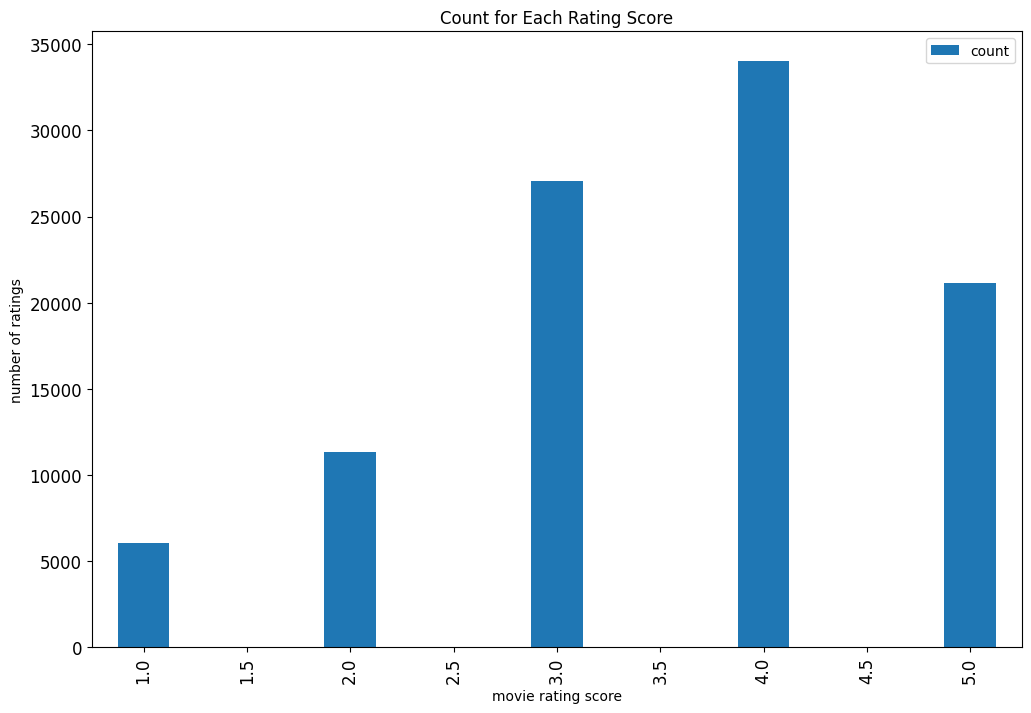

In [113]:
ax = rating_count_df.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [114]:
total_count = num_items * num_users
zero_count = total_count-refined_dataset.shape[0]
zero_count

1469459

In [115]:
rating_count_df = pd.concat([ pd.DataFrame({'count': zero_count}, index=[0.0]),rating_count_df ]).sort_index()
rating_count_df

,count
0.0,1469459
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


In [116]:
rating_count_df['log_count'] = np.log(rating_count_df['count'])
rating_count_df

,count,log_count
0.0,1469459,14.200405
1.0,6083,8.713253
1.5,3,1.098612
2.0,11334,9.335562
2.5,6,1.791759
3.0,27060,10.205812
3.5,19,2.944439
4.0,34042,10.435350
4.5,16,2.772589
5.0,21130,9.958449


In [117]:
rating_count_df = rating_count_df.reset_index().rename(columns={'index': 'rating score'})
rating_count_df


,rating score,count,log_count
0,0.0,1469459,14.200405
1,1.0,6083,8.713253
2,1.5,3,1.098612
3,2.0,11334,9.335562
4,2.5,6,1.791759
5,3.0,27060,10.205812
6,3.5,19,2.944439
7,4.0,34042,10.435350
8,4.5,16,2.772589
9,5.0,21130,9.958449


Text(0, 0.5, 'number of ratings')

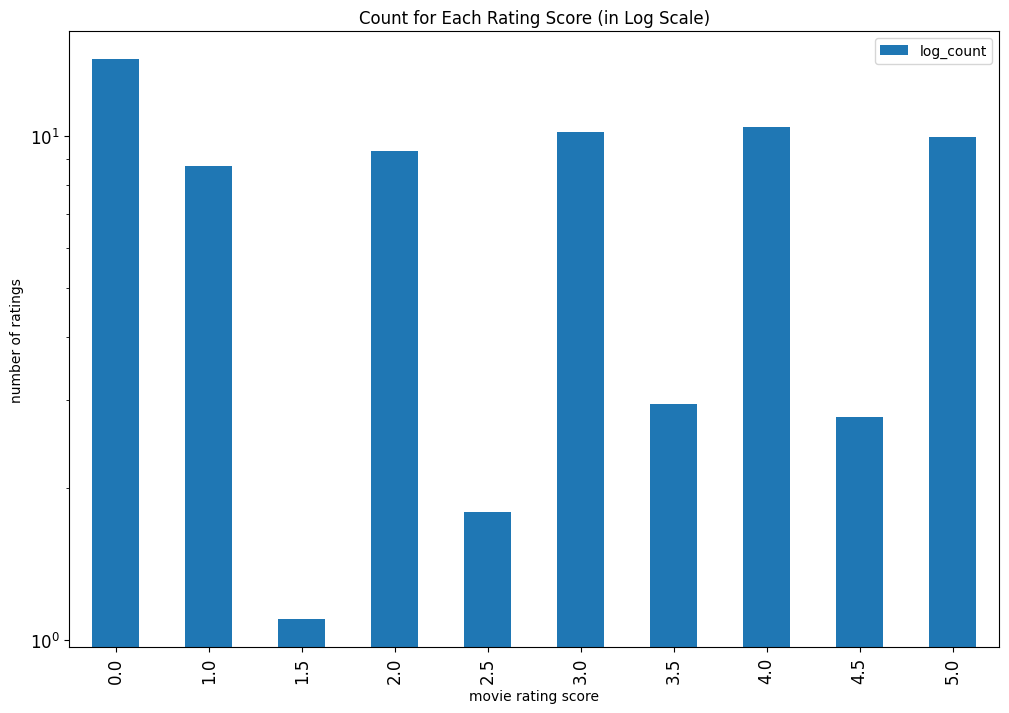

In [118]:

ax = rating_count_df.plot('rating score', 'log_count', 'bar', figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12,)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [119]:
refined_dataset.head()


,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [120]:
# rating frequency
movies_count_df = pd.DataFrame(refined_dataset.groupby('movie title').size(), columns=["count"])
movies_count_df

,count
movie title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41
...,...
Young Guns II (1990),44
"Young Poisoner's Handbook, The (1995)",41
Zeus and Roxanne (1997),6


Text(0, 0.5, 'number of ratings')

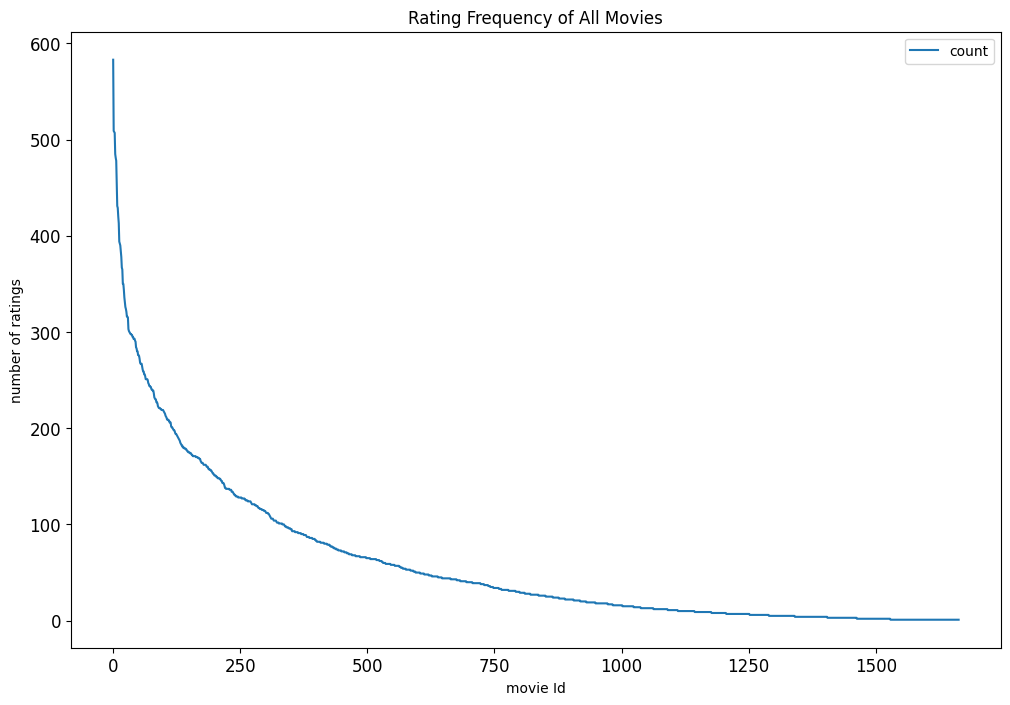

In [121]:
# plot rating frequency of all movies
ax = movies_count_df \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

## KNN model to build item based collaborative recommender system

We need to transform (reshape in this case) the data in such a way that each row of the dataframe represents a movie and each column represents a different user. So we want the data to be [movies, users] array if movie is the subject where similar movies must be found and [users, movies] array for reverse.

To reshape the dataframe, we will pivot the dataframe to the wide format with movies as rows and users as columns. As we know that not all users watch all the movies, we can expect a lot of missing values. We will have to fill those missing observations with 0s since we are going to perform linear algebra operations (calculating distances between vectors).

Finally, we transform the values of the dataframe into a scipy sparse matrix for most efficient calculations.

This dataframe is then fed into a KNN model.

In [122]:
# pivot and create movie-user matrix
user_to_movie_df = refined_dataset.pivot(
    index='user id',
     columns='movie title',
      values='rating').fillna(0)

user_to_movie_df.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


In [123]:
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
    

In [124]:
# transform matrix to scipy sparse matrix
user_to_movie_sparse_df = csr_matrix(user_to_movie_df.values)
user_to_movie_sparse_df

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 99693 stored elements and shape (943, 1664)>

In [125]:
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_to_movie_sparse_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [126]:
## function to find top n similar users of the given input user 

def get_similar_users(user, n = 5):
    knn_input = np.asarray(user_to_movie_df.values[user-1]).reshape(1,-1)

    distances, indexes = knn_model.kneighbors(knn_input, n_neighbors=n+1)

    print(f"Top {n} users who are very much similar to the User- {user} are: ")
    print(" ")

    for i in range(1,len(distances[0])):
        print(i,". User:", indexes[0][i]+1, "separated by distance of",distances[0][i])
        
    return indexes.flatten()[1:] + 1, distances.flatten()[1:]

In [127]:
from pprint import pprint
user_id = 889
print(" Few of movies seen by the User:")
pprint(list(refined_dataset[refined_dataset['user id'] == user_id]['movie title'])[:10])
similar_user_list, distance_list = get_similar_users(user_id,5)

 Few of movies seen by the User:
['12 Angry Men (1957)',
 '2 Days in the Valley (1996)',
 '2001: A Space Odyssey (1968)',
 '39 Steps, The (1935)',
 'Absolute Power (1997)',
 'Abyss, The (1989)',
 'Ace Ventura: Pet Detective (1994)',
 'Addams Family Values (1993)',
 'Adventures of Priscilla, Queen of the Desert, The (1994)',
 'African Queen, The (1951)']
Top 5 users who are very much similar to the User- 889 are: 
 
1 . User: 303 separated by distance of 0.41005802151839865
2 . User: 429 separated by distance of 0.41075937177715116
3 . User: 916 separated by distance of 0.4165764936314822
4 . User: 276 separated by distance of 0.440910608071275
5 . User: 435 separated by distance of 0.4500420070501985


In [128]:
similar_user_list, distance_list

(array([303, 429, 916, 276, 435]),
 array([0.41005802, 0.41075937, 0.41657649, 0.44091061, 0.45004201]))

In [129]:
weightage_list = distance_list/np.sum(distance_list)
weightage_list

array([0.19266507, 0.1929946 , 0.19572776, 0.2071611 , 0.21145147])

In [130]:
mov_rtngs_sim_users = user_to_movie_df.values[similar_user_list]
mov_rtngs_sim_users

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
movies_list = user_to_movie_df.columns
movies_list

Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
       ...
       'Yankee Zulu (1994)', 'Year of the Horse (1997)', 'You So Crazy (1994)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Zeus and Roxanne (1997)', 'unknown',
       'Á köldum klaka (Cold Fever) (1994)'],
      dtype='object', name='movie title', length=1664)

In [132]:
print("Weightage list shape:", len(weightage_list))
print("mov_rtngs_sim_users shape:", mov_rtngs_sim_users.shape)
print("Number of movies:", len(movies_list))

Weightage list shape: 5
mov_rtngs_sim_users shape: (5, 1664)
Number of movies: 1664


In [133]:
weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
weightage_list.shape

(5, 1664)

In [134]:
new_rating_matrix = weightage_list*mov_rtngs_sim_users
mean_rating_list = new_rating_matrix.sum(axis =0)
mean_rating_list

array([0., 0., 0., ..., 0., 0., 0.])

In [135]:
from pprint import pprint
def recommend_movies(n):
  n = min(len(mean_rating_list),n)
  # print(np.argsort(mean_rating_list)[::-1][:n])
  pprint(list(movies_list[np.argsort(mean_rating_list)[::-1][:n]]))

In [136]:
print("Movies recommended based on similar users are: ")
recommend_movies(10)

Movies recommended based on similar users are: 
['Jerry Maguire (1996)',
 'Sleepers (1996)',
 'Leaving Las Vegas (1995)',
 'Star Wars (1977)',
 'Heat (1995)',
 'Fargo (1996)',
 'Ransom (1996)',
 'Dead Man Walking (1995)',
 'Truth About Cats & Dogs, The (1996)',
 'Happy Gilmore (1996)']


### Drawbacks:

1. But this recommendation system has a drawback, it also recommends movies which are already seen by the given input User.

2. And also there is a possibility of recommending the movies which are not at all seen by any of the similar users.

Above drawbacks are addressed and a new recommender system with modification is built

In [137]:
def filtered_movie_recommendations(n):
    first_zero_index = np.where(mean_rating_list == 0)[0][-1]
    sorted_index = np.argsort(mean_rating_list)[::-1]
    sorted_index = sorted_index[:list(sorted_index).index(first_zero_index)]
    n = min(len(sorted_index), n)

    movies_watched = list(refined_dataset[refined_dataset["user id"] == user_id]['movie title'])
    filtered_movies_list = list(movies_list[sorted_index])

    count = 0
    final_movies_list = []

    for i in filtered_movies_list:
        if i not in movies_watched:
            count += 1
            final_movies_list.append(i)
        if count == n:
            break
    if count == 0:
        print(f"There are no movies left which are not seen by the input users and seen by similar users.May be increasing the number of similar users who are to be considered may give a chance of suggesting an unseen good movie.")
    else:
        pprint(final_movies_list)

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [138]:
filtered_movie_recommendations(10)

['Sleepers (1996)',
 'Truth About Cats & Dogs, The (1996)',
 'Scream (1996)',
 'Titanic (1997)',
 'English Patient, The (1996)',
 'Bed of Roses (1996)',
 'Saint, The (1997)',
 'Breaking the Waves (1996)',
 'Conspiracy Theory (1997)',
 'Unforgettable (1996)']


In [ ]:
from pprint import pprint


class MovieRecommenderSystem:
    def __init__(self, refined_dataset, user_to_movie_df, knn_model):
        """
        Initialize the MovieRecommenderSystem with required data and models.
        
        Parameters:
        -----------
        refined_dataset : pandas.DataFrame
            Dataset containing user_id and movie_title columns
        user_to_movie_df : pandas.DataFrame
            User-movie matrix with users as rows and movies as columns
        knn_model : sklearn.neighbors.NearestNeighbors
            Trained KNN model for finding similar users
        """
        self.refined_dataset = refined_dataset
        self.user_to_movie_df = user_to_movie_df
        self.knn_model = knn_model
        self.movies_list = user_to_movie_df.columns

    def get_user_movies(self, user_id):
        """Get movies seen by a specific user."""
        user_movies = list(self.refined_dataset[self.refined_dataset['user id'] == user_id]['movie title'])
        print("Movies seen by the User:")
        pprint(user_movies)
        print("")
        return user_movies

    def get_similar_users(self, user_id, n=5):
        """
        Find similar users using KNN model.
        
        Parameters:
        -----------
        user_id : int
            User ID to find similar users for
        n : int
            Number of similar users to return
            
        Returns:
        --------
        tuple : (similar_users, distances)
        """
        knn_input = np.asarray([self.user_to_movie_df.values[user_id-1]])
        distances, indices = self.knn_model.kneighbors(knn_input, n_neighbors=n+1)
        
        print(f"Top {n} users who are very much similar to the User-{user_id} are:")
        print("")
        for i in range(1, len(distances[0])):
            print(f"{i}. User: {indices[0][i]+1} separated by distance of {distances[0][i]}")
        print("")
        
        return indices.flatten()[1:] + 1, distances.flatten()[1:]

    def get_movie_recommendations(self, user_id, n_similar_users=5, n_movies=10):
        """
        Get movie recommendations for a user.
        
        Parameters:
        -----------
        user_id : int
            User ID to get recommendations for
        n_similar_users : int
            Number of similar users to consider
        n_movies : int
            Number of movies to recommend
            
        Returns:
        --------
        list : Recommended movies
        """
        # Get similar users and their distances
        similar_user_list, distance_list = self.get_similar_users(user_id, n_similar_users)
        
        # Calculate weightage for each similar user
        weightage_list = distance_list/np.sum(distance_list)
        mov_rtngs_sim_users = self.user_to_movie_df.values[similar_user_list-1]
        weightage_list = weightage_list[:, np.newaxis] + np.zeros(len(self.movies_list))
        
        # Calculate weighted ratings
        new_rating_matrix = weightage_list * mov_rtngs_sim_users
        mean_rating_list = new_rating_matrix.sum(axis=0)
        
        print("")
        print("Movies recommended based on similar users are:")
        print("")
        
        return self._filter_recommendations(user_id, mean_rating_list, n_movies, similar_user_list)
    
    def calculate_diversity_score(self, recommendations):
        if not recommendations:
            return 0
        genres = []
        unique_genres = set(sum(genres, []))
        return len(unique_genres) / len(recommendations)

    def calculate_confidence_score(self, movie, similar_users):
        ratings = self.user_to_movie_df.loc[similar_users, movie]
        rated_count = ratings[ratings > 0].count()
        rating_variance = ratings.var()
        return (rated_count / len(similar_users)) * (1 / (1 + rating_variance))

    
    def _filter_recommendations(self, user_id, mean_rating_list, n_movies, similar_users):
        """
        Filter and return final movie recommendations.
        
        Parameters:
        -----------
        user_id : int
            User ID to filter movies for
        mean_rating_list : numpy.array
            List of mean ratings for all movies
        n_movies : int
            Number of movies to recommend
            
        Returns:
        --------
        list : Filtered movie recommendations
        """
        # Find last zero rating index
        first_zero_index = np.where(mean_rating_list == 0)[0][-1]
        
        # Sort movies by rating
        sortd_index = np.argsort(mean_rating_list)[::-1]
        sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
        
        # Get movies already watched by user
        movies_watched = self.get_user_movies(user_id)
        
        # Filter movies
        filtered_movie_list = list(self.movies_list[sortd_index])
        recommendations = []
        
        for movie in filtered_movie_list:
            if movie not in movies_watched:
                confidence = self.calculate_confidence_score(movie, similar_users)
                # diversity = self.calculate_diversity_score([m['movie'] for m in recommendations] + [movie])
                
                recommendations.append({
                    'movie': movie,
                    'rating': mean_rating_list[list(self.movies_list).index(movie)],
                    'confidence': confidence,
                })
                
                if len(recommendations) == n_movies:
                    break
        
        if not recommendations:
            print("No unseen movies found. Try increasing the number of similar users.")
        else:
            print("\nRecommended movies:")
            for rec in recommendations:
                print(f"\nMovie: {rec['movie']}")
                print(f"Predicted Rating: {rec['rating']:.2f}")
                print(f"Confidence Score: {rec['confidence']:.2f}")
                print(f"Diversity Score: {rec['diversity_score']:.2f}")
            
        return recommendations

In [140]:
# Initialize the recommender system
recommender = MovieRecommenderSystem(refined_dataset, user_to_movie_df, knn_model)

# Get recommendations for a user
user_id = 788
recommendations = recommender.get_movie_recommendations(
    user_id=user_id,
    n_similar_users=5,
    n_movies=5
)
# recommendations = recommender.get_movie_recommendations(user_id=1, n_similar_users=5, n_movies=10)


Top 5 users who are very much similar to the User-788 are:

1. User: 328 separated by distance of 0.17133685463298853
2. User: 7 separated by distance of 0.4556979079152671
3. User: 311 separated by distance of 0.45835065276145137
4. User: 194 separated by distance of 0.4613826773821439
5. User: 627 separated by distance of 0.46643138327894984


Movies recommended based on similar users are:

Movies seen by the User:
['20,000 Leagues Under the Sea (1954)',
 '2001: A Space Odyssey (1968)',
 'Absolute Power (1997)',
 'Abyss, The (1989)',
 'African Queen, The (1951)',
 'Air Force One (1997)',
 'Alaska (1996)',
 'Alien (1979)',
 'Alien 3 (1992)',
 'Aliens (1986)',
 'American President, The (1995)',
 'American Werewolf in London, An (1981)',
 'Angels in the Outfield (1994)',
 'Apocalypse Now (1979)',
 'Apollo 13 (1995)',
 'Back to the Future (1985)',
 'Bad Company (1995)',
 'Basic Instinct (1992)',
 'Batman (1989)',
 'Batman Forever (1995)',
 'Batman Returns (1992)',
 'Beyond Rangoon (1995)

### KNN model using input as movie name and no of movies you want to recommmend

In [141]:
movies_to_user_df = refined_dataset.pivot(
    index='movie title',
    columns= 'user id',
    values='rating'
).fillna(0)

movies_to_user_df.head()

user id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
# transform matrix to scipy sparse matrix
movie_to_user_sparse_df = csr_matrix(movies_to_user_df.values)
movie_to_user_sparse_df

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 99693 stored elements and shape (1664, 943)>

In [143]:
movies_list = list(movies_to_user_df.index)
movies_list[:10]

["'Til There Was You (1997)",
 '1-900 (1994)',
 '101 Dalmatians (1996)',
 '12 Angry Men (1957)',
 '187 (1997)',
 '2 Days in the Valley (1996)',
 '20,000 Leagues Under the Sea (1954)',
 '2001: A Space Odyssey (1968)',
 '3 Ninjas: High Noon At Mega Mountain (1998)',
 '39 Steps, The (1935)']

In [144]:
movie_dict = {movie : index for index, movie in enumerate(movies_list)}
print(movie_dict)

{"'Til There Was You (1997)": 0, '1-900 (1994)': 1, '101 Dalmatians (1996)': 2, '12 Angry Men (1957)': 3, '187 (1997)': 4, '2 Days in the Valley (1996)': 5, '20,000 Leagues Under the Sea (1954)': 6, '2001: A Space Odyssey (1968)': 7, '3 Ninjas: High Noon At Mega Mountain (1998)': 8, '39 Steps, The (1935)': 9, '8 1/2 (1963)': 10, '8 Heads in a Duffel Bag (1997)': 11, '8 Seconds (1994)': 12, 'A Chef in Love (1996)': 13, 'Above the Rim (1994)': 14, 'Absolute Power (1997)': 15, 'Abyss, The (1989)': 16, 'Ace Ventura: Pet Detective (1994)': 17, 'Ace Ventura: When Nature Calls (1995)': 18, 'Across the Sea of Time (1995)': 19, 'Addams Family Values (1993)': 20, 'Addicted to Love (1997)': 21, 'Addiction, The (1995)': 22, 'Adventures of Pinocchio, The (1996)': 23, 'Adventures of Priscilla, Queen of the Desert, The (1994)': 24, 'Adventures of Robin Hood, The (1938)': 25, 'Affair to Remember, An (1957)': 26, 'African Queen, The (1951)': 27, 'Afterglow (1997)': 28, 'Age of Innocence, The (1993)': 2

In [145]:
case_insensitive_movies_list = [i.lower() for i in movies_list]

In [146]:
knn_movie_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_movie_model.fit(movie_to_user_sparse_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [147]:
def get_similar_movies(movie, n = 10):
  ## input to this function is the movie and number of top similar movies you want.
  index = movie_dict[movie]
  knn_input = np.asarray([movies_to_user_df.values[index]])
  n = min(len(movies_list)-1,n)
  distances, indices = knn_movie_model.kneighbors(knn_input, n_neighbors=n+1)
  
  print("Top",n,"movies which are very much similar to the Movie-",movie, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(movies_list[indices[0][i]])
  

In [148]:
from pprint import pprint
movie_name = '101 Dalmatians (1996)'

get_similar_movies(movie_name,15)

Top 15 movies which are very much similar to the Movie- 101 Dalmatians (1996) are: 
 
Jack (1996)
Twister (1996)
Willy Wonka and the Chocolate Factory (1971)
Independence Day (ID4) (1996)
Toy Story (1995)
Father of the Bride Part II (1995)
Hunchback of Notre Dame, The (1996)
Lion King, The (1994)
Mrs. Doubtfire (1993)
Jungle Book, The (1994)
Grumpier Old Men (1995)
Mission: Impossible (1996)
Mr. Holland's Opus (1995)
Homeward Bound II: Lost in San Francisco (1996)
Dragonheart (1996)


In [149]:
def get_possible_movies(movie):

    temp = ''
    possible_movies = case_insensitive_movies_list.copy()
    for i in movie :
      out = []
      temp += i
      for j in possible_movies:
        if temp in j:
          out.append(j)
      if len(out) == 0:
          return possible_movies
      out.sort()
      possible_movies = out.copy()

    return possible_movies

In [150]:
class invalid(Exception):
    pass

def spell_correction():
    
    try:

      movie_name = input("Enter the Movie name: ")
      movie_name_lower = movie_name.lower()
      if movie_name_lower not in case_insensitive_movies_list :
        raise invalid
      else :
        # movies_list[case_insensitive_country_names.index(movie_name_lower)]
        num_recom = int(input("Enter Number of movie recommendations needed: "))
        get_similar_movies(movies_list[case_insensitive_movies_list.index(movie_name_lower)],num_recom)

    except invalid:

      possible_movies = get_possible_movies(movie_name_lower)

      if len(possible_movies) == len(movies_list) :
        print("Movie name entered is does not exist in the list ")
      else :
        indices = [case_insensitive_movies_list.index(i) for i in possible_movies]
        print("Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :\n",[movies_list[i] for i in indices])
        spell_correction()


In [151]:
# spell_correction()
